In [1]:
# 挖掘时序的shapelets
import pandas as pd 
import os 

# 去除警告
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd = os.getcwd()

In [143]:
import numpy as np
# 提取时序交易信息

len_timeseries = 50

X_timeseries = pd.DataFrame()
indexs = []
labels = []
timeseries = []

# 提取钓鱼信息
for filename in os.listdir(pwd + '/钓鱼一阶节点'):
    if filename.endswith('.csv'):
        data = pd.read_csv(pwd + '/钓鱼一阶节点/' + filename)
        # 当From为filname的时候，Value为负值
        data.loc[data['From'] == filename.split('.')[0], 'Value'] = -data['Value']
        # 每次交易后的余额
        data['Balance'] = data['Value'].cumsum()
        # 提取Value
        values = data['Balance'].values
        timeseries.append(values)

        # 对齐数据，使得每个文件的数据长度相同
        if len(values) < len_timeseries:
            values = np.pad(values, (0, len_timeseries - len(values)), 'constant')
        else:
            values = values[:len_timeseries]

        # 最后一列为label
        
        X_timeseries = X_timeseries.append(pd.DataFrame(values).T)
        indexs.append(filename.split('.')[0])
        labels.append(0)

# 提取正常交易信息
for filename in os.listdir(pwd + '/非钓鱼一阶节点'):
    if filename.endswith('.csv'):
        data = pd.read_csv(pwd + '/非钓鱼一阶节点/' + filename)
        # 当From为filname的时候，Value为负值
        data.loc[data['From'] == filename.split('.')[0], 'Value'] = -data['Value']
        # 每次交易后的余额
        data['Balance'] = data['Value'].cumsum()
        # 提取Value
        values = data['Balance'].values
        timeseries.append(values)

        # 对齐数据，使得每个文件的数据长度相同
        if len(values) < len_timeseries:
            # values = np.pad(values, (0, len_timeseries - len(values)), 'constant')
            # 设置为最后一个值
            values = np.pad(values, (0, len_timeseries - len(values)), 'edge')
        else:
            values = values[:len_timeseries]
        
        X_timeseries = X_timeseries.append(pd.DataFrame(values).T)
        indexs.append(filename.split('.')[0])
        labels.append(1)

# 最后一列的列名为label
X_timeseries['label'] = labels
X_timeseries['address'] = indexs
X_timeseries.fillna(0, inplace=True)


In [144]:
X_timeseries.index = [i for i in range(X_timeseries.shape[0])]

In [145]:
# address放到第一列
cols = X_timeseries.columns.tolist()
cols = cols[-1:] + cols[:-1]
X_timeseries = X_timeseries[cols]

X_timeseries.to_csv('./datasets/tx_timeseries.csv', index=False)

In [146]:
X_timeseries.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
count,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3.360000e+03,3.360000e+03,...,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3360.000000
mean,769.873788,1352.361565,2020.859103,2435.838560,2474.384556,2460.230187,2461.563671,2454.263358,2.411711e+03,2.418362e+03,...,2.869127e+03,2.868995e+03,2.875667e+03,2.890531e+03,2.916032e+03,2.716079e+03,2.749672e+03,2.782972e+03,2.810344e+03,0.505952
std,5507.389409,9642.093623,15187.778288,22677.282975,23711.400426,24558.265600,25489.295296,26206.610546,2.728621e+04,2.817424e+04,...,5.324869e+04,5.356134e+04,5.378868e+04,5.411508e+04,5.479596e+04,4.779312e+04,4.868250e+04,4.943797e+04,5.015572e+04,0.500039
min,-7551.539950,-228000.000000,-228001.000000,-248001.000000,-268001.000000,-278001.000000,-308001.000000,-364800.000000,-4.559990e+05,-4.469980e+05,...,-4.279000e+05,-4.279000e+05,-4.279000e+05,-4.279000e+05,-4.279000e+05,-4.279000e+05,-4.279000e+05,-4.279000e+05,-4.279000e+05,0.000000
25%,0.100000,0.100000,0.304360,0.098248,0.083379,0.008169,0.002386,0.000861,9.110000e-16,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,0.986370,1.600000,4.197824,5.635548,7.514647,8.203674,8.689152,9.125380,9.925201e+00,1.031130e+01,...,2.288056e-03,1.845000e-03,1.590000e-03,1.845000e-03,1.451476e-03,1.386000e-03,1.273456e-03,1.071000e-03,1.224262e-03,1.000000
75%,6.990988,199.925000,746.466847,900.000000,967.164939,1000.000000,1000.014667,1000.382522,1.000157e+03,1.000734e+03,...,1.000383e+03,1.000734e+03,1.000412e+03,1.000734e+03,1.000734e+03,1.000939e+03,1.000974e+03,1.001000e+03,1.001030e+03,1.000000
max,158494.072997,200000.100000,550002.110000,887731.548291,924896.606435,960033.289736,995783.729059,995783.730059,1.033212e+06,1.071894e+06,...,2.101184e+06,2.117267e+06,2.131414e+06,2.152359e+06,2.185249e+06,2.037502e+06,2.062502e+06,2.087502e+06,2.112502e+06,1.000000


In [147]:
X_timeseries.head()

,address,0,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,label
0,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,0.586269,0.000861,0.948376,0.001092,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0.500000,0.501020,0.000630,0.818430,0.000924,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0x0059b14e35dab1b4eee1e2926c7a5660da66f747,0.450017,0.457393,0.556801,0.563723,0.568270,0.570575,0.574259,0.588520,0.595542,...,3.986715,3.98932,3.991305,3.999379,4.002653,4.027329,4.227329,4.234658,4.239549,0
3,0x0061fb5485dff4bb85c078dca80d19119224d97e,0.500000,1.000000,1.500000,2.000000,2.589139,3.089139,3.189139,2.189139,2.190139,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0x00650a784ee109797ba8c05f3496bdbf2b2b7a1c,0.680000,0.004000,0.000700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


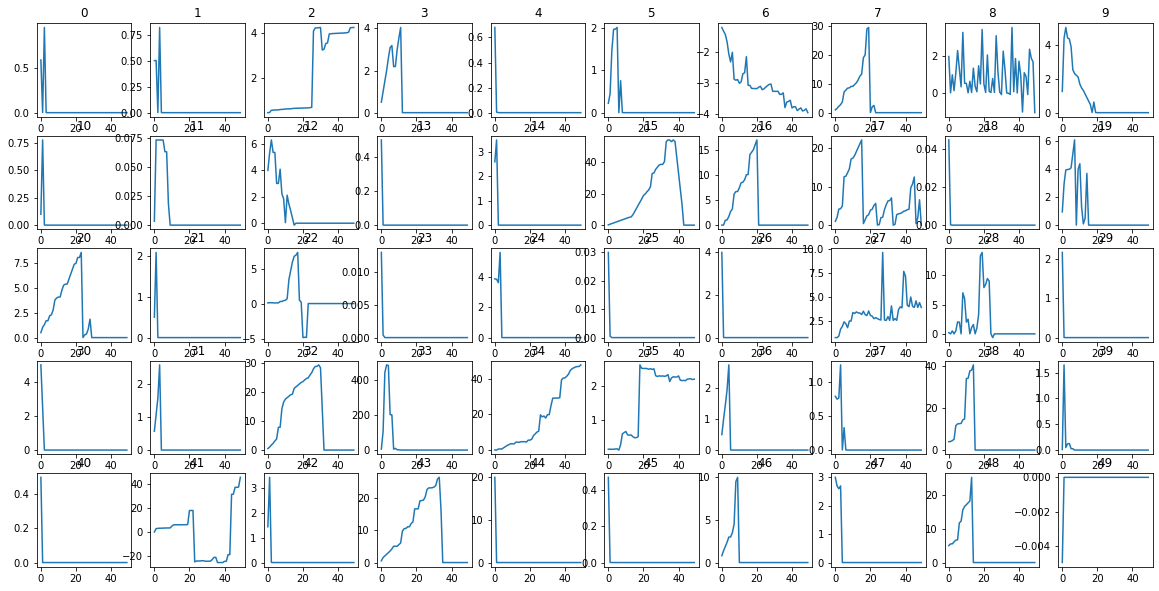

In [148]:
# 画图，共画50个，每行10个
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 10, figsize=(20, 10))

for i in range(50):
    axes[i // 10, i % 10].plot(X_timeseries.iloc[i, 1:-1])
    axes[i // 10, i % 10].set_title(X_timeseries.iloc[i, 0])
    # 设置title为i
    axes[i // 10, i % 10].set_title(i)

In [370]:
import random

# 生成随机长度的Shapelets，shapelets长度最小为10, 值的范围在(-10, 10)之间
num_of_shapelets = 10
range_of_shapelets = (-10, 10)
timeseries_len = 20

shapelets = []

for i in range(num_of_shapelets):
    shapelets.append(random.sample(range(range_of_shapelets[0], range_of_shapelets[1]), timeseries_len))

shapelet2 = [0.70629, 1.20629, 2.29629,  3.29329,  0, 0.20224496, 1.20224496, 11.20224496, 21.20224496, 10.60214496]
shapelets.append(shapelet2)

In [371]:
# 计算motifs与其他样本之间的dtw

from pyts.metrics import dtw

data = pd.DataFrame()
data['label'] = X_timeseries['label']

index = 0
# 计算motifs与其他样本之间的dtw
for motif in shapelets:
    distance = []
    for i in range(X_timeseries.shape[0]):
        sample_timeseries = list(timeseries[i])
        if len(sample_timeseries) < 2:
            sample_timeseries.append(sample_timeseries[-1])
        distance.append(dtw(motif, sample_timeseries))
    
    distance = pd.DataFrame(np.array(distance).reshape(-1, 1))
    
    distance.columns = ['motif_' + str(index)]
    
    data = pd.concat([data, distance], axis=1)

    index += 1
    

In [372]:
data.head()


,label,motif_0,motif_1,motif_2,motif_3,motif_4,motif_5,motif_6,motif_7,motif_8,motif_9,motif_10
0,0,25.007682,24.859018,24.839958,25.323983,25.312086,25.341532,25.505499,25.358454,25.431498,25.029806,25.241988
1,0,25.121720,24.990395,24.974201,25.455373,25.380953,25.400719,25.545540,25.420469,25.486262,25.142166,25.415513
2,0,144.072860,145.163118,143.498038,143.940885,146.454832,144.455880,144.919543,145.167906,144.424404,143.845365,70.900013
3,0,26.940410,25.695044,27.802240,26.546902,25.097967,25.666759,26.815569,27.396171,24.846277,26.745449,20.158098
4,0,25.507799,25.788963,25.552992,25.736057,25.894876,25.763420,25.798183,25.912897,25.964426,25.444489,26.137265


In [373]:
# 划分数据集

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size=0.2, random_state=42)

In [374]:
# svm
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.99      0.74       352
           1       0.96      0.26      0.40       320

    accuracy                           0.64       672
   macro avg       0.78      0.62      0.57       672
weighted avg       0.77      0.64      0.58       672



In [375]:
# xgboost
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       352
           1       0.94      0.97      0.95       320

    accuracy                           0.96       672
   macro avg       0.96      0.96      0.96       672
weighted avg       0.96      0.96      0.96       672



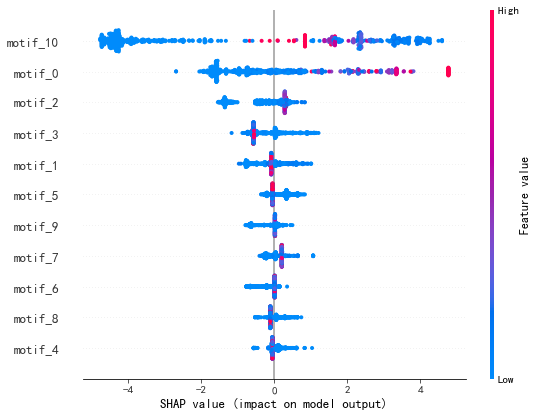

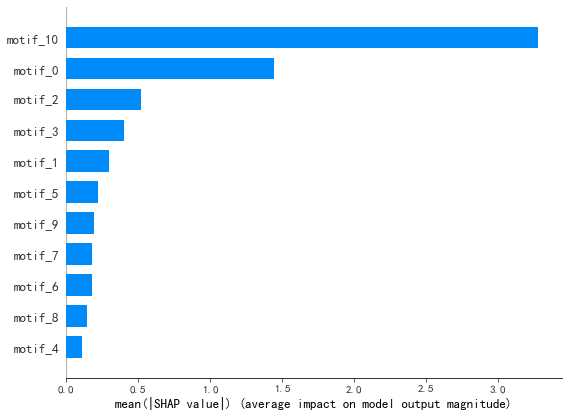

In [376]:
# SHAP解释样本
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

shap.summary_plot(shap_values, X_test)

# SHAP输出特征重要性
shap.summary_plot(shap_values, X_test, plot_type="bar")

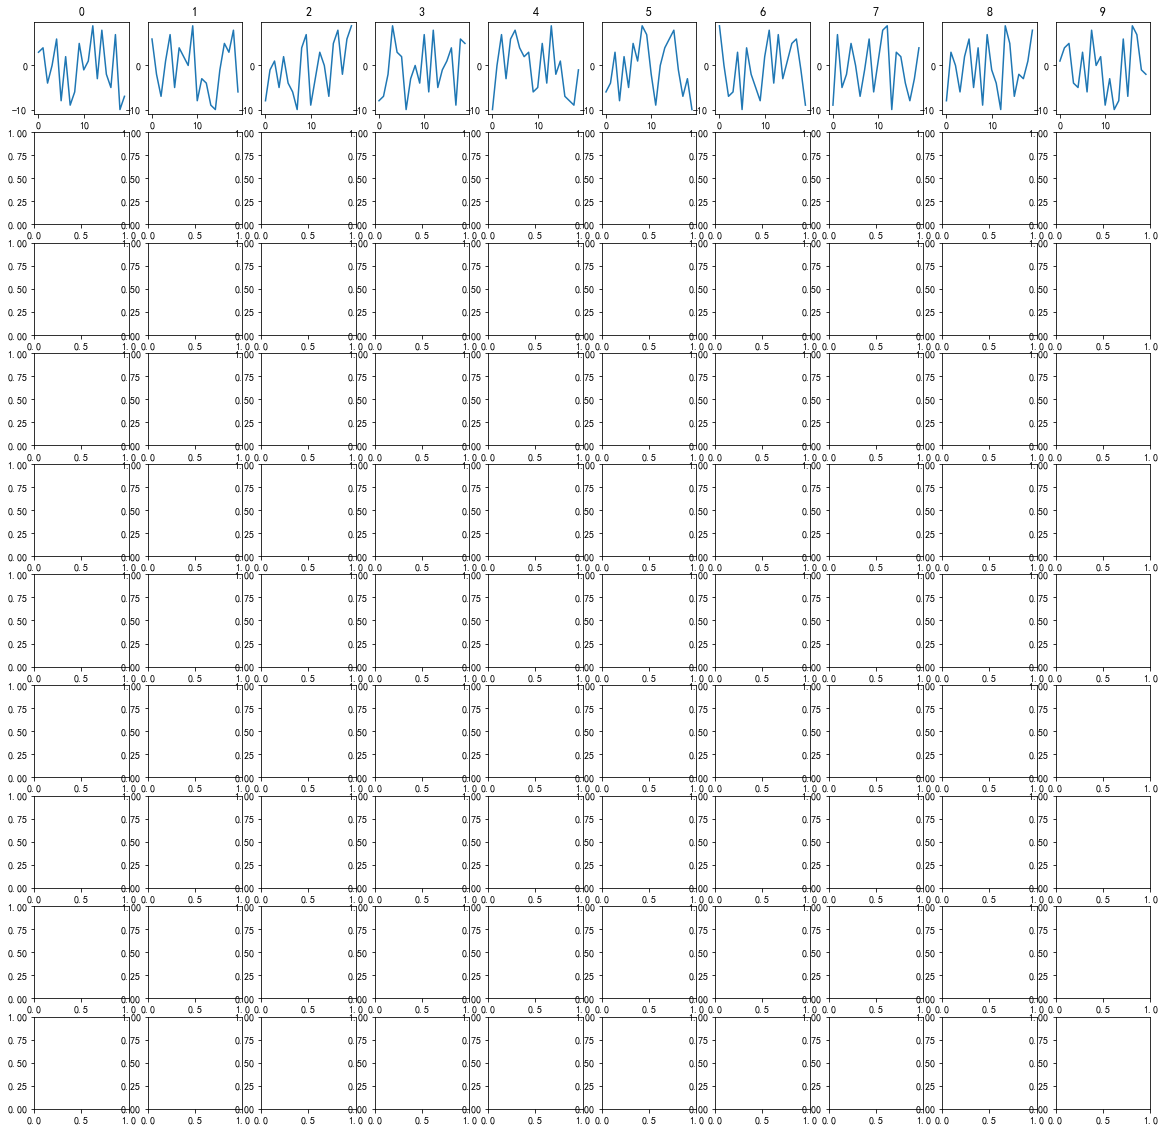

In [345]:
# plot shapelets

import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(20, 20))

for i in range(len(shapelets)):
    axes[i // 10, i % 10].plot(shapelets[i])
    axes[i // 10, i % 10].set_title(i)

In [364]:
features_test = X_timeseries.iloc[:, 1:-1].values.mean(axis=1)
labels_test = X_timeseries.iloc[:, -1].values

print(features_test.shape, labels_test.shape)

(3360,) (3360,)


In [365]:
# 划分数据集

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_test.reshape(-1, 1), labels_test, test_size=0.2, random_state=42)

In [366]:
# xgboost

clf = XGBClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       352
           1       0.94      0.95      0.94       320

    accuracy                           0.94       672
   macro avg       0.94      0.94      0.94       672
weighted avg       0.94      0.94      0.94       672



In [367]:
# 划分数据集

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_timeseries.iloc[:, 1:-1].values, X_timeseries.iloc[:, -1].values, test_size=0.2, random_state=42)

In [368]:
# xgboost

clf = XGBClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       352
           1       0.98      0.97      0.97       320

    accuracy                           0.97       672
   macro avg       0.97      0.97      0.97       672
weighted avg       0.97      0.97      0.97       672



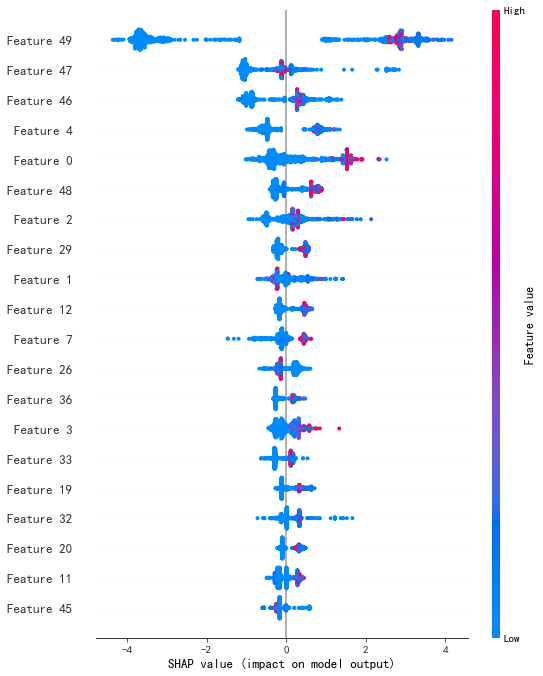

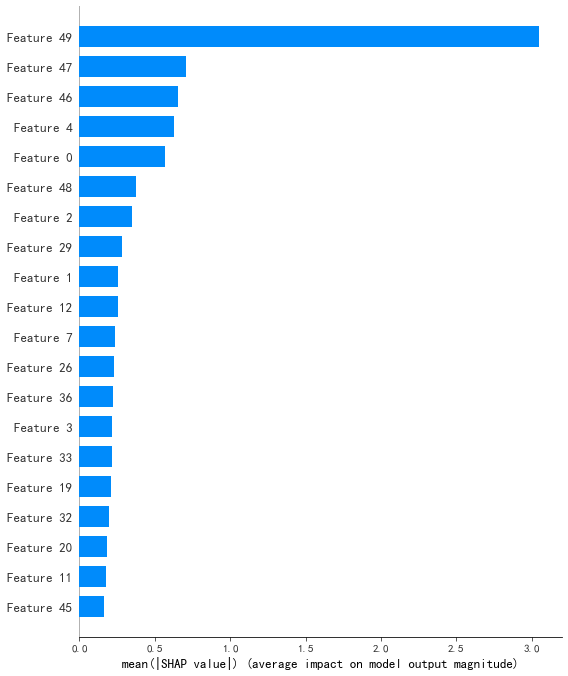

In [369]:
# SHAP解释样本
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

shap.summary_plot(shap_values, X_test)

# SHAP输出特征重要性
shap.summary_plot(shap_values, X_test, plot_type="bar")